### Data Science Regression Project: Predicting Home Prices in Vizag

In [175]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

### Data Load: Load vizag home prices into a dataframe

In [247]:
df1 = pd.read_csv("Vizag_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [177]:
df1.shape

(13320, 9)

In [178]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [179]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### Data Cleaning: Handle NA values

In [248]:
df3 = df2.dropna(axis='rows')

In [249]:

df3.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [183]:
df3.shape

(13246, 5)

In [184]:
df3['size'].unique()

#defines all the BHK in the data list

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Feature Engineering

Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [185]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/Users/newuser/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [186]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [187]:
df3['bhk'].unique()


#gives no.of bhk over all

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

### Explore total_sqft feature

In [188]:
df3[df3.bhk>20]

# more than 20Bedrooms

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [189]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [190]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

# Returns the float value

In [191]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [192]:
def convert_sqft_to_num(x):
    print(convert_sqft_to_num)
    
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

    
# Gives the exact float value from string 

In [193]:
convert_sqft_to_num('2166')


<function convert_sqft_to_num at 0x11b5fd0e0>


2166.0

In [194]:
convert_sqft_to_num('2100 - 2850')

<function convert_sqft_to_num at 0x11b5fd0e0>


2475.0

In [195]:
def convert_sqft_to_num(x):
    print(convert_sqft_to_num)
    
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        token2 = x.split('Sq. Meter')
        val = token2[0]
        print(val)
        print(type(float(val)))
        return float(val)


# Returns the string value
   

In [196]:
convert_sqft_to_num('34.46Sq. Meter')

<function convert_sqft_to_num at 0x11ade4200>
34.46
<class 'float'>


34.46

In [197]:
def convert_sqft_to_num(x):
    tokens = x.split('Perch')
    if len(tokens) == 2:
        try:
            return float(x)
        except:
            token3 = x.split('Perch')
            val1 = token3[0]
            print(val1)
            print(type(str(val1)))
        return float(val1)
print(convert_sqft_to_num)
    
 # Returns the str value

<function convert_sqft_to_num at 0x11b5fd320>


In [198]:
convert_sqft_to_num('4125Perch')



4125
<class 'str'>


4125.0

In [199]:
def convert_sqft_to_num(x):
    
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
    def convert_sqft_to_num(x):
        tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        token2 = x.split('Sq. Meter')
        val = token2[0]
        print(val)
        print(type(float(val)))
        return float(val)
   
    tokens = x.split('Perch')
    if len(tokens) == 2:
        try:
            return float(x)
        except:
            token3 = x.split('Perch')
            val1 = token3[0]
            print(val1)
            print(type(str(val1)))
            return float(val1)
    
# Summing up all the values of float, string, and differneces value to the main data list

In [200]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(32)
print('total_sqft')

total_sqft


### Feature Engineering

Add new feature called price per square feet

In [201]:

df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()
# Dividing the price in INR

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [202]:
len(df5.location.unique())


1304

In [203]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

# Returns the Highest value in the list

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [204]:
len(location_stats[location_stats<=10])

1052

### Dimensionality Reduction

Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [205]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

# returns the least value which is less than 10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [206]:
len(df5.location.unique())

1293

In [207]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

# Gives unique value

242

In [208]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [209]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic

As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [210]:
df5[df5.total_sqft/df5.bhk<300].head()

# Total_sqft less than 300

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


### Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [211]:
df5.shape

(13246, 7)

In [212]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

### Outlier Removal Using Standard Deviation and Mean

In [213]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [214]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

# Removing the errors i.e Outliers in the list
# Removing the unwanted data and making the data supervised by reducing the columns
# by mean and std 

(10241, 7)

### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

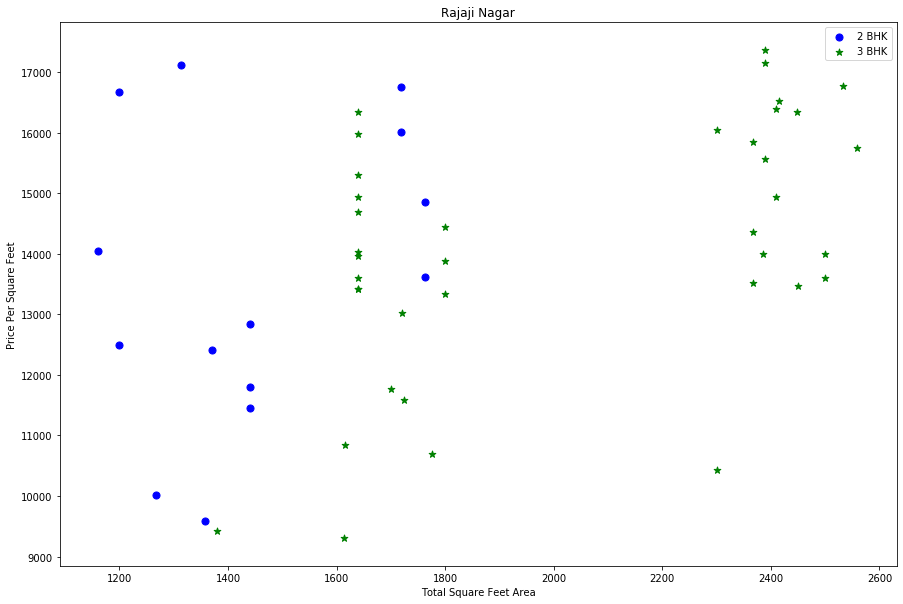

In [215]:
def Plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='*',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
                
Plot_scatter_chart(df7,"Rajaji Nagar")  

# Visulization part of finding the price per square feet and total square feet area



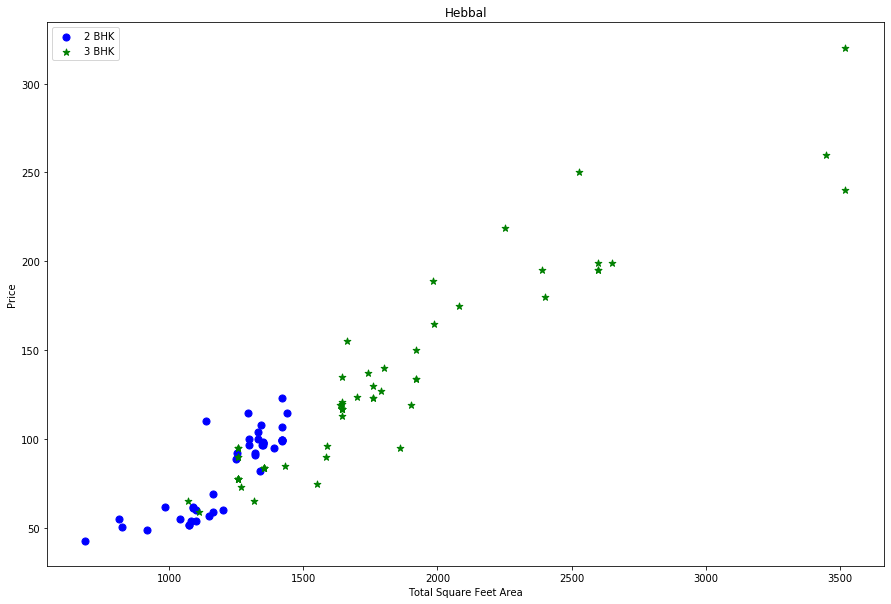

In [216]:
def Plot_scatter_chart(df,location):
    
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='*',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
                
Plot_scatter_chart(df7,"Hebbal")


#Visualization for price and total ssquare feet area
                

In [217]:
# To remove the properties where for same location, the price of the 3bedroom apts is ;less than 2 bed apt with same square ft area. 
{
    '1' : {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std': 2300,
        'count': 22
    },
}

# we did is for a given location, now we can remove 2bhk apt whoses sqft is less tahn the mean price per sqft of 1bhk apt

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [218]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    print(exclude_indices)
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        print(location, location_df)
        print(bhk_stats)
        for bhk, bhk_df in location_df.groupby('bhk'):
            print("bhk here", bhk)
            #stats = bhk_stats.get(bhk-1)
            
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk)
            
            if stats and stats['count']>5:
                try:
                    print("stats here ", stats,stats['mean'], bhk_df)
                    print("h1",bhk_df.price_per_sqft, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                    exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                except:
                    pass
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape                        

[]
1st Block Jayanagar               location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491
2  1st Block Jayanagar  3 BHK      1875.0   2.0  235.0    3    12533.333333
3  1st Block Jayanagar  3 BHK      1200.0   2.0  130.0    3    10833.333333
4  1st Block Jayanagar  2 BHK      1235.0   2.0  148.0    2    11983.805668
5  1st Block Jayanagar  4 BHK      2750.0   4.0  413.0    4    15018.181818
6  1st Block Jayanagar  4 BHK      2450.0   4.0  368.0    4    15020.408163
{}
bhk here 2
bhk here 3
bhk here 4
1st Phase JP Nagar               location       size  total_sqft  bath  price  bhk  \
7   1st Phase JP Nagar      4 BHK      2825.0   4.0  250.0    4   
8   1st Phase JP Nagar      3 BHK      1875.0   3.0  167.0    3   
9   1st Phase JP Nagar  5 Bedroom      1500.0   5.0   85.0    5   
10  1st Phase JP Nagar      3 BHK      2065.0 

Name: price_per_sqft, dtype: float64 [107 108 109 115 116 123 124 130 133 150 167 173 181 185 189]
8th Phase JP Nagar                location       size  total_sqft  bath    price  bhk  \
191  8th Phase JP Nagar      2 BHK      1073.5   2.0   54.005    2   
192  8th Phase JP Nagar      1 BHK       451.0   1.0   29.900    1   
193  8th Phase JP Nagar      3 BHK      1240.0   3.0   43.500    3   
194  8th Phase JP Nagar      2 BHK      1062.0   2.0   42.470    2   
195  8th Phase JP Nagar      3 BHK      1230.0   2.0   43.500    3   
196  8th Phase JP Nagar      3 BHK      1455.0   3.0   73.310    3   
197  8th Phase JP Nagar      2 BHK       871.0   2.0   55.000    2   
198  8th Phase JP Nagar      2 BHK      1098.0   2.0   43.910    2   
199  8th Phase JP Nagar      3 BHK      1800.0   3.0   80.000    3   
200  8th Phase JP Nagar  4 Bedroom      2700.0   4.0  130.000    4   
201  8th Phase JP Nagar      2 BHK      1080.0   2.0   38.000    2   
202  8th Phase JP Nagar      2 BHK      10

Ambedkar Nagar            location       size  total_sqft  bath  price  bhk  price_per_sqft
365  Ambedkar Nagar      3 BHK      1935.0   4.0  130.0    3     6718.346253
366  Ambedkar Nagar      2 BHK      1424.0   2.0   90.0    2     6320.224719
367  Ambedkar Nagar      3 BHK      2225.0   4.0  169.0    3     7595.505618
368  Ambedkar Nagar      3 BHK      1862.0   3.0  120.0    3     6444.683136
369  Ambedkar Nagar      3 BHK      1850.0   4.0  139.0    3     7513.513514
370  Ambedkar Nagar      3 BHK      1936.0   4.0  126.0    3     6508.264463
371  Ambedkar Nagar      3 BHK      1862.0   3.0  119.0    3     6390.977444
372  Ambedkar Nagar      2 BHK      1424.0   2.0   90.0    2     6320.224719
373  Ambedkar Nagar      3 BHK      2150.0   4.0  125.0    3     5813.953488
374  Ambedkar Nagar      4 BHK      3530.0   4.0  290.0    4     8215.297450
375  Ambedkar Nagar      3 BHK      1856.0   3.0  120.0    3     6465.517241
376  Ambedkar Nagar      3 BHK      1852.0   3.0  130.0    3 

Arekere     location   size  total_sqft  bath  price  bhk  price_per_sqft
522  Arekere  3 BHK      2060.0   3.0  140.0    3     6796.116505
523  Arekere  2 BHK       920.0   2.0   40.0    2     4347.826087
524  Arekere  3 BHK      1740.0   2.0   95.0    3     5459.770115
525  Arekere  2 BHK      1190.0   2.0   55.0    2     4621.848739
526  Arekere  1 BHK       600.0   1.0   28.0    1     4666.666667
527  Arekere  3 BHK      2072.0   3.0  108.0    3     5212.355212
528  Arekere  2 BHK      1100.0   2.0   55.0    2     5000.000000
529  Arekere  2 BHK       900.0   2.0   50.0    2     5555.555556
530  Arekere  4 BHK      2710.0   6.0  142.0    4     5239.852399
531  Arekere  2 BHK      1240.0   2.0   60.0    2     4838.709677
532  Arekere  2 BHK       900.0   2.0   44.5    2     4944.444444
{}
bhk here 1
bhk here 2
bhk here 3
bhk here 4
stats here  {'mean': 4884.730750645279, 'std': 371.1132245946985, 'count': 6} 4884.730750645279     location   size  total_sqft  bath  price  bhk  price_

bhk here 1
bhk here 2
stats here  {'mean': 5865.01000449379, 'std': 539.315075028032, 'count': 9} 5865.01000449379      location   size  total_sqft  bath   price  bhk  price_per_sqft
650  Balagere  1 BHK       790.5   1.0  41.900    1     5300.442758
659  Balagere  1 BHK       675.0   1.0  45.000    1     6666.666667
660  Balagere  1 BHK       656.0   1.0  43.000    1     6554.878049
668  Balagere  1 BHK       645.0   1.0  34.180    1     5299.224806
671  Balagere  1 BHK       790.5   1.0  42.295    1     5350.411132
673  Balagere  1 BHK       656.0   1.0  38.770    1     5910.060976
674  Balagere  1 BHK       645.0   1.0  39.000    1     6046.511628
675  Balagere  1 BHK       645.0   1.0  41.000    1     6356.589147
677  Balagere  1 BHK       656.0   1.0  34.770    1     5300.304878
h1 650    5300.442758
659    6666.666667
660    6554.878049
668    5299.224806
671    5350.411132
673    5910.060976
674    6046.511628
675    6356.589147
677    5300.304878
Name: price_per_sqft, dtype: fl

Bannerghatta          location   size  total_sqft  bath  price  bhk  price_per_sqft
813  Bannerghatta  4 BHK      3012.0   6.0  250.0    4     8300.132802
814  Bannerghatta  3 BHK      1665.0   3.0  110.0    3     6606.606607
815  Bannerghatta  3 BHK      2370.0   4.0  195.0    3     8227.848101
816  Bannerghatta  2 BHK      1100.0   2.0   66.0    2     6000.000000
817  Bannerghatta  2 BHK      1113.0   2.0   70.0    2     6289.308176
818  Bannerghatta  2 BHK      1200.0   2.0   73.2    2     6100.000000
819  Bannerghatta  2 BHK      1070.0   2.0   87.0    2     8130.841121
820  Bannerghatta  3 BHK      1776.0   3.0  124.0    3     6981.981982
821  Bannerghatta  3 BHK      1776.0   3.0  150.0    3     8445.945946
{}
bhk here 2
bhk here 3
bhk here 4
Bannerghatta Road               location   size  total_sqft  bath   price  bhk  price_per_sqft
822  Bannerghatta Road  1 BHK       500.0   1.0   18.50    1     3700.000000
823  Bannerghatta Road  2 BHK      1050.0   2.0   65.00    2     6190

bhk here 2
bhk here 3
bhk here 4
stats here  {'mean': 3624.166282880881, 'std': 262.3730178311292, 'count': 35} 3624.166282880881         location   size  total_sqft  bath  price  bhk  price_per_sqft
1024  Begur Road  2 BHK      1200.0   2.0  44.00    2     3666.666667
1025  Begur Road  2 BHK      1200.0   2.0  46.80    2     3900.000000
1026  Begur Road  2 BHK      1160.0   2.0  44.00    2     3793.103448
1030  Begur Road  2 BHK      1200.0   2.0  43.20    2     3600.000000
1031  Begur Road  2 BHK      1160.0   2.0  44.08    2     3800.000000
1032  Begur Road  2 BHK      1200.0   2.0  45.00    2     3750.000000
1035  Begur Road  2 BHK      1200.0   2.0  37.80    2     3150.000000
1036  Begur Road  2 BHK      1160.0   2.0  40.59    2     3499.137931
1037  Begur Road  2 BHK      1260.0   2.0  46.62    2     3700.000000
1041  Begur Road  2 BHK      1160.0   2.0  42.00    2     3620.689655
1042  Begur Road  2 BHK      1240.0   2.0  39.06    2     3150.000000
1043  Begur Road  2 BHK      1

stats here  {'mean': 6179.829109009818, 'std': 1029.8742088847782, 'count': 6} 6179.829109009818           location       size  total_sqft  bath  price  bhk  price_per_sqft
1229  Billekahalli      3 BHK      1935.0   3.0  110.0    3     5684.754522
1231  Billekahalli      3 BHK      1650.0   3.0   88.0    3     5333.333333
1234  Billekahalli  3 Bedroom      2400.0   3.0  150.0    3     6250.000000
1235  Billekahalli      3 BHK      2968.0   3.0  225.0    3     7580.862534
1240  Billekahalli      3 BHK      1290.0   3.0   62.0    3     4806.201550
1241  Billekahalli      3 BHK      1805.0   3.0  134.0    3     7423.822715
h1 1229    5684.754522
1231    5333.333333
1234    6250.000000
1235    7580.862534
1240    4806.201550
1241    7423.822715
Name: price_per_sqft, dtype: float64 [1229 1231 1240]
Binny Pete         location   size  total_sqft  bath   price  bhk  price_per_sqft
1242  Binny Pete  3 BHK      1755.0   3.0  122.00    3     6951.566952
1243  Binny Pete  1 BHK       665.0   1.0

stats here  {'mean': 5837.4926933902225, 'std': 903.6255944977522, 'count': 19} 5837.4926933902225          location   size  total_sqft  bath  price  bhk  price_per_sqft
1369  Brookefield  2 BHK      1150.0   2.0   69.0    2     6000.000000
1370  Brookefield  2 BHK      1142.0   2.0   70.0    2     6129.597198
1377  Brookefield  2 BHK      1262.0   2.0   75.0    2     5942.947702
1378  Brookefield  2 BHK      1139.0   2.0   80.0    2     7023.705004
1379  Brookefield  2 BHK      1125.0   2.0   70.0    2     6222.222222
1382  Brookefield  2 BHK       941.0   2.0   48.0    2     5100.956429
1385  Brookefield  2 BHK      1100.0   2.0   55.0    2     5000.000000
1387  Brookefield  2 BHK      1225.0   2.0   66.5    2     5428.571429
1389  Brookefield  2 BHK      1080.0   2.0   50.0    2     4629.629630
1390  Brookefield  2 BHK      1230.0   2.0   55.0    2     4471.544715
1391  Brookefield  2 BHK      1200.0   2.0   75.0    2     6250.000000
1392  Brookefield  2 BHK      1089.0   2.0   49.0

h1 1577    3606.716418
1580    6122.448980
1585    5647.500000
1590    3435.114504
1599    3896.992481
1602    4130.000000
1603    3333.333333
1605    5647.500000
1606    4686.192469
Name: price_per_sqft, dtype: float64 [1577 1590 1599 1602 1603]
Chikka Tirupathi               location       size  total_sqft  bath   price  bhk  \
1612  Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
1613  Chikka Tirupathi  4 Bedroom      2325.0   4.0  120.00    4   
1614  Chikka Tirupathi  3 Bedroom      1808.0   4.0   80.27    3   
1615  Chikka Tirupathi  3 Bedroom      3297.0   3.0  135.00    3   
1616  Chikka Tirupathi  4 Bedroom      3500.0   5.0  150.00    4   
1617  Chikka Tirupathi  3 Bedroom      2646.0   3.0   99.00    3   
1618  Chikka Tirupathi  4 Bedroom      2704.0   5.0  105.00    4   
1619  Chikka Tirupathi  3 Bedroom      2325.0   3.0   95.00    3   
1620  Chikka Tirupathi  4 Bedroom      2325.0   4.0  120.00    4   
1621  Chikka Tirupathi  4 Bedroom      3250.0   4.0  136

bhk here 3
bhk here 5
stats here  {'mean': 4559.695263559465, 'std': 476.6579147263085, 'count': 6} 4559.695263559465          location   size  total_sqft  bath  price  bhk  price_per_sqft
1740  Devanahalli  1 BHK       658.0   1.0  34.00    1     5167.173252
1741  Devanahalli  1 BHK       658.0   1.0  26.91    1     4089.665653
1742  Devanahalli  1 BHK       698.5   1.0  28.57    1     4090.193271
1747  Devanahalli  1 BHK       775.0   1.0  39.00    1     5032.258065
1748  Devanahalli  1 BHK      1020.0   2.0  49.87    1     4889.215686
1756  Devanahalli  1 BHK       658.0   1.0  26.91    1     4089.665653
h1 1740    5167.173252
1741    4089.665653
1742    4090.193271
1747    5032.258065
1748    4889.215686
1756    4089.665653
Name: price_per_sqft, dtype: float64 [1741 1742 1756]
stats here  {'mean': 4952.787098845229, 'std': 492.9480389583671, 'count': 13} 4952.787098845229          location   size  total_sqft  bath   price  bhk  price_per_sqft
1730  Devanahalli  2 BHK      1260.0   

bhk here 3
bhk here 4
stats here  {'mean': 6352.512219589275, 'std': 547.9667498496266, 'count': 7} 6352.512219589275        location   size  total_sqft  bath  price  bhk  price_per_sqft
1877  EPIP Zone  2 BHK      1285.0   2.0  82.00    2     6381.322957
1879  EPIP Zone  2 BHK      1330.0   2.0  92.50    2     6954.887218
1880  EPIP Zone  2 BHK      1330.0   2.0  86.98    2     6539.849624
1881  EPIP Zone  2 BHK      1330.0   2.0  93.36    2     7019.548872
1884  EPIP Zone  2 BHK      1280.0   2.0  69.00    2     5390.625000
1885  EPIP Zone  2 BHK      1125.0   2.0  65.00    2     5777.777778
1888  EPIP Zone  2 BHK      1343.0   2.0  86.00    2     6403.574088
h1 1877    6381.322957
1879    6954.887218
1880    6539.849624
1881    7019.548872
1884    5390.625000
1885    5777.777778
1888    6403.574088
Name: price_per_sqft, dtype: float64 [1884 1885]
stats here  {'mean': 6961.117262886345, 'std': 262.90361114936303, 'count': 8} 6961.117262886345        location   size  total_sqft  bath 

2377  Frazer Town  3 BHK      1870.0   3.0  180.00    3     9625.668449
h1 2353    10588.235294
2354     7314.176245
2355     9893.048128
2356     8571.428571
2358    10000.000000
2359     9428.571429
2360    12127.659574
2362     7631.578947
2363    10351.562500
2364    10833.333333
2365    11250.000000
2369     9026.963658
2370    10582.010582
2373    12903.225806
2374     7407.407407
2377     9625.668449
Name: price_per_sqft, dtype: float64 [2354 2356 2359 2362 2369 2374 2377]
stats here  {'mean': 9580.08324073647, 'std': 1086.7606066839614, 'count': 6} 9580.08324073647          location   size  total_sqft  bath  price  bhk  price_per_sqft
2357  Frazer Town  4 BHK      4850.0   6.0  385.0    4     7938.144330
2366  Frazer Town  4 BHK      3436.0   5.0  341.0    4     9924.330617
2367  Frazer Town  4 BHK      4856.0   5.0  410.0    4     8443.163097
2371  Frazer Town  4 BHK      3435.0   2.0  341.0    4     9927.219796
2372  Frazer Town  4 BHK      3436.0   5.0  345.0    4    10040.7

bhk here 2
bhk here 3
bhk here 4
stats here  {'mean': 3938.0120307679967, 'std': 369.34106505379697, 'count': 12} 3938.0120307679967      location   size  total_sqft  bath  price  bhk  price_per_sqft
2500   Gunjur  2 BHK      1140.0   2.0  43.00    2     3771.929825
2504   Gunjur  2 BHK      1140.0   2.0  49.11    2     4307.894737
2505   Gunjur  2 BHK      1195.0   2.0  44.00    2     3682.008368
2506   Gunjur  2 BHK      1190.0   2.0  40.00    2     3361.344538
2507   Gunjur  2 BHK      1457.0   2.0  60.00    2     4118.050789
2508   Gunjur  2 BHK      1080.0   2.0  41.00    2     3796.296296
2511   Gunjur  2 BHK      1175.0   2.0  43.48    2     3700.425532
2513   Gunjur  2 BHK      1071.0   2.0  51.00    2     4761.904762
2514   Gunjur  2 BHK      1063.0   2.0  40.00    2     3762.935089
2515   Gunjur  2 BHK      1235.0   2.0  52.76    2     4272.064777
2519   Gunjur  2 BHK      1235.0   2.0  44.50    2     3603.238866
2520   Gunjur  2 BHK      1457.0   2.0  60.00    2     4118.050

2792   Harlur  2 BHK      1335.0   2.0  72.76    2     5450.187266
h1 2722    5106.100796
2727    5877.342419
2728    4743.465634
2729    7017.543860
2731    6473.594549
2733    6589.147287
2737    5989.583333
2738    6744.186047
2744    6599.832916
2745    6643.952300
2748    4333.333333
2749    6599.832916
2751    6388.415673
2760    6611.570248
2762    4854.368932
2765    6850.459482
2766    6907.137375
2768    6388.415673
2770    6516.290727
2771    6968.992248
2772    6132.756133
2773    6303.236797
2774    6643.952300
2780    6432.748538
2783    4571.428571
2784    6349.206349
2786    6265.664160
2788    6675.020886
2789    4807.692308
2791    6423.357664
2792    5450.187266
Name: price_per_sqft, dtype: float64 [2722 2727 2728 2737 2748 2762 2772 2783 2789 2792]
stats here  {'mean': 6733.500810366982, 'std': 1010.6906117602452, 'count': 34} 6733.500810366982      location   size  total_sqft  bath  price  bhk  price_per_sqft
2723   Harlur  3 BHK     1752.12   3.0  135.0    3     7

stats here  {'mean': 5664.294405842, 'std': 916.5454988680965, 'count': 55} 5664.294405842          location   size  total_sqft  bath   price  bhk  price_per_sqft
3029  Hennur Road  2 BHK      1385.0   2.0   83.09    2     5999.277978
3030  Hennur Road  2 BHK      1317.5   2.0   63.77    2     4840.227704
3033  Hennur Road  2 BHK      1157.0   2.0   84.00    2     7260.155575
3040  Hennur Road  2 BHK      1232.0   2.0   89.00    2     7224.025974
3041  Hennur Road  2 BHK      1065.0   2.0   42.60    2     4000.000000
3046  Hennur Road  2 BHK      1232.0   2.0   69.61    2     5650.162338
3047  Hennur Road  2 BHK       987.0   2.0   49.00    2     4964.539007
3052  Hennur Road  2 BHK      1065.0   2.0   42.60    2     4000.000000
3053  Hennur Road  2 BHK      1385.0   2.0   83.09    2     5999.277978
3059  Hennur Road  2 BHK       901.0   2.0   49.50    2     5493.895671
3062  Hennur Road  2 BHK      1182.0   2.0   82.50    2     6979.695431
3064  Hennur Road  2 BHK      1036.0   2.0   

bhk here 3
bhk here 4
bhk here 5
stats here  {'mean': 9162.737420366177, 'std': 1759.0622093546074, 'count': 9} 9162.737420366177            location       size  total_sqft  bath  price  bhk  price_per_sqft
3355  Hosakerehalli      3 BHK      2378.0   3.0  262.0    3    11017.661901
3356  Hosakerehalli      3 BHK      2376.0   3.0  203.0    3     8543.771044
3361  Hosakerehalli      3 BHK      1817.0   4.0  153.0    3     8420.473308
3363  Hosakerehalli      3 BHK      2480.0   3.0  245.0    3     9879.032258
3365  Hosakerehalli      3 BHK      2480.0   4.0  260.0    3    10483.870968
3366  Hosakerehalli      3 BHK      1596.0   3.0   79.8    3     5000.000000
3367  Hosakerehalli  3 Bedroom      1200.0   2.0  100.0    3     8333.333333
3371  Hosakerehalli      3 BHK      2480.0   4.0  265.0    3    10685.483871
3373  Hosakerehalli      3 BHK      2376.0   3.0  240.0    3    10101.010101
h1 3355    11017.661901
3356     8543.771044
3361     8420.473308
3363     9879.032258
3365    10483

stats here  {'mean': 14277.01762523191, 'std': 4557.109914183873, 'count': 7} 14277.01762523191           location       size  total_sqft  bath  price  bhk  price_per_sqft
3500  Indira Nagar  4 Bedroom      2200.0   4.0  200.0    4     9090.909091
3511  Indira Nagar  4 Bedroom      2400.0   4.0  525.0    4    21875.000000
3523  Indira Nagar  4 Bedroom      3200.0   3.0  250.0    4     7812.500000
3526  Indira Nagar      4 BHK      3200.0   4.0  440.0    4    13750.000000
3527  Indira Nagar      4 BHK      4000.0   4.0  700.0    4    17500.000000
3529  Indira Nagar  4 Bedroom      2400.0   4.0  405.0    4    16875.000000
3534  Indira Nagar      4 BHK      2800.0   4.0  365.0    4    13035.714286
h1 3500     9090.909091
3511    21875.000000
3523     7812.500000
3526    13750.000000
3527    17500.000000
3529    16875.000000
3534    13035.714286
Name: price_per_sqft, dtype: float64 [3500 3523 3526 3534]
JP Nagar       location       size  total_sqft  bath    price  bhk  price_per_sqft
3539

bhk here 1
bhk here 2
bhk here 3
bhk here 4
bhk here 6
bhk here 7
bhk here 9
stats here  {'mean': 4334.439122287065, 'std': 915.4655005942303, 'count': 51} 4334.439122287065       location       size  total_sqft  bath  price  bhk  price_per_sqft
3732  KR Puram      2 BHK     1277.50   2.0  56.80    2     4446.183953
3733  KR Puram      2 BHK      930.00   2.0  39.00    2     4193.548387
3734  KR Puram      2 BHK     1155.00   2.0  42.74    2     3700.432900
3735  KR Puram      2 BHK     1225.00   2.0  46.55    2     3800.000000
3736  KR Puram      2 BHK     1100.00   2.0  47.00    2     4272.727273
3737  KR Puram  2 Bedroom     1200.00   2.0  71.00    2     5916.666667
3739  KR Puram      2 BHK      750.00   2.0  25.00    2     3333.333333
3741  KR Puram      2 BHK     1015.00   2.0  43.00    2     4236.453202
3742  KR Puram      2 BHK     1470.00   2.0  86.00    2     5850.340136
3744  KR Puram      2 BHK     1142.00   2.0  51.00    2     4465.849387
3745  KR Puram      2 BHK     1115

3952  Kalyan nagar  2 BHK      1100.0   2.0   70.0    2     6363.636364
h1 3939    4756.097561
3943    6759.259259
3945    3750.000000
3947    5425.709516
3948    5200.000000
3949    5042.016807
3950    4097.605893
3952    6363.636364
Name: price_per_sqft, dtype: float64 [3939 3945 3949 3950]
Kambipura        location   size  total_sqft  bath  price  bhk  price_per_sqft
3953  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3954  Kambipura  3 BHK      1082.0   2.0  56.00    3     5175.600739
3955  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3956  Kambipura  3 BHK      1082.0   2.0  45.00    3     4158.964880
3957  Kambipura  2 BHK       883.0   2.0  39.00    2     4416.761042
3958  Kambipura  2 BHK       883.0   2.0  45.00    2     5096.262741
3959  Kambipura  2 BHK       883.0   2.0  39.00    2     4416.761042
3960  Kambipura  3 BHK      1082.0   2.0  55.00    3     5083.179298
3961  Kambipura  3 BHK      1082.0   2.0  45.00    3     4158.964880
3962  

stats here  {'mean': 7548.041260232853, 'std': 960.2983417649926, 'count': 6} 7548.041260232853           location       size  total_sqft  bath  price  bhk  price_per_sqft
4234  Karuna Nagar  3 Bedroom      2500.0   3.0  180.0    3     7200.000000
4235  Karuna Nagar  3 Bedroom      2500.0   3.0  190.0    3     7600.000000
4236  Karuna Nagar  3 Bedroom      1962.0   3.0  175.0    3     8919.469929
4238  Karuna Nagar      3 BHK      1354.0   2.0   98.0    3     7237.813885
4239  Karuna Nagar      3 BHK      1945.0   3.0  115.0    3     5912.596401
4240  Karuna Nagar      3 BHK      1960.0   3.0  165.0    3     8418.367347
h1 4234    7200.000000
4235    7600.000000
4236    8919.469929
4238    7237.813885
4239    5912.596401
4240    8418.367347
Name: price_per_sqft, dtype: float64 [4234 4238 4239]
Kasavanhalli           location       size  total_sqft  bath   price  bhk  price_per_sqft
4241  Kasavanhalli      2 BHK     1060.00   2.0   58.06    2     5477.358491
4242  Kasavanhalli      3 BH

stats here  {'mean': 3285.4634212085666, 'std': 199.6880849428014, 'count': 7} 3285.4634212085666               location   size  total_sqft  bath  price  bhk  price_per_sqft
4448  Kereguddadahalli  2 BHK       950.0   2.0   32.0    2     3368.421053
4450  Kereguddadahalli  2 BHK       800.0   2.0   28.0    2     3500.000000
4451  Kereguddadahalli  2 BHK       904.0   2.0   30.0    2     3318.584071
4453  Kereguddadahalli  2 BHK      1000.0   2.0   30.0    2     3000.000000
4456  Kereguddadahalli  2 BHK      1080.0   2.0   32.0    2     2962.962963
4457  Kereguddadahalli  2 BHK      1000.0   2.0   34.0    2     3400.000000
4460  Kereguddadahalli  2 BHK      1015.0   2.0   35.0    2     3448.275862
h1 4448    3368.421053
4450    3500.000000
4451    3318.584071
4453    3000.000000
4456    2962.962963
4457    3400.000000
4460    3448.275862
Name: price_per_sqft, dtype: float64 [4453 4456]
Kodichikkanahalli                location       size  total_sqft  bath  price  bhk  \
4461  Kodichikka

bhk here 1
bhk here 2
bhk here 3
bhk here 4
bhk here 5
stats here  {'mean': 4854.565077877619, 'std': 214.79334119523998, 'count': 25} 4854.565077877619       location   size  total_sqft  bath  price  bhk  price_per_sqft
4601  Kothanur  2 BHK      1200.0   2.0   51.0    2     4250.000000
4604  Kothanur  2 BHK      1186.0   2.0   58.0    2     4890.387858
4610  Kothanur  2 BHK      1187.0   2.0   58.0    2     4886.267902
4613  Kothanur  2 BHK      1185.0   2.0   59.0    2     4978.902954
4618  Kothanur  2 BHK      1070.0   2.0   45.5    2     4252.336449
4620  Kothanur  2 BHK      1145.0   2.0   56.0    2     4890.829694
4622  Kothanur  2 BHK      1455.0   2.0   69.0    2     4742.268041
4624  Kothanur  2 BHK      1302.0   2.0   68.5    2     5261.136713
4626  Kothanur  2 BHK      1185.0   2.0   58.0    2     4894.514768
4628  Kothanur  2 BHK      1075.0   2.0   53.0    2     4930.232558
4633  Kothanur  2 BHK      1141.0   2.0   54.0    2     4732.690622
4636  Kothanur  2 BHK      1160

bhk here 2
bhk here 3
stats here  {'mean': 6489.713291330107, 'std': 297.6789512592486, 'count': 22} 6489.713291330107                   location   size  total_sqft  bath  price  bhk  \
4789  Lakshminarayana Pura  2 BHK      1185.0   2.0   75.0    2   
4791  Lakshminarayana Pura  2 BHK      1180.0   2.0   75.0    2   
4792  Lakshminarayana Pura  2 BHK      1172.0   2.0   82.0    2   
4793  Lakshminarayana Pura  2 BHK      1179.0   2.0   75.0    2   
4794  Lakshminarayana Pura  2 BHK      1149.0   2.0   75.0    2   
4795  Lakshminarayana Pura  2 BHK      1336.0   2.0  100.0    2   
4796  Lakshminarayana Pura  2 BHK      1175.0   2.0   75.0    2   
4797  Lakshminarayana Pura  2 BHK      1190.0   2.0   75.0    2   
4798  Lakshminarayana Pura  2 BHK      1200.0   2.0   75.0    2   
4799  Lakshminarayana Pura  2 BHK      1200.0   2.0   75.0    2   
4800  Lakshminarayana Pura  2 BHK      1165.0   2.0   75.0    2   
4801  Lakshminarayana Pura  2 BHK      1145.0   2.0   75.0    2   
4803  Laks

h1 4910    10555.555556
4911    11126.760563
4919     9302.325581
4922    10000.000000
4925     8000.000000
4927    11333.333333
4932     7843.137255
4933    15000.000000
4936     9333.333333
4938    13571.428571
4942     8865.248227
Name: price_per_sqft, dtype: float64 [4919 4922 4925 4932 4936 4942]
stats here  {'mean': 12896.335169301065, 'std': 1734.1363331722873, 'count': 22} 12896.335169301065           location   size  total_sqft  bath  price  bhk  price_per_sqft
4905  Malleshwaram  3 BHK      2006.0   3.0  297.0    3    14805.583250
4907  Malleshwaram  3 BHK      2475.0   4.0  332.0    3    13414.141414
4908  Malleshwaram  3 BHK      2610.0   3.0  399.0    3    15287.356322
4909  Malleshwaram  3 BHK      2475.0   4.0  320.0    3    12929.292929
4912  Malleshwaram  3 BHK      2000.0   3.0  250.0    3    12500.000000
4913  Malleshwaram  3 BHK      2215.0   3.0  275.0    3    12415.349887
4914  Malleshwaram  3 BHK      1600.0   3.0  160.0    3    10000.000000
4915  Malleshwaram  3

NGR Layout         location   size  total_sqft  bath  price  bhk  price_per_sqft
5181  NGR Layout  2 BHK      1020.0   2.0  45.90    2     4500.000000
5182  NGR Layout  2 BHK      1105.0   2.0  49.73    2     4500.452489
5183  NGR Layout  2 BHK      1022.0   2.0  45.90    2     4491.193738
5184  NGR Layout  2 BHK      1020.0   2.0  45.00    2     4411.764706
5185  NGR Layout  2 BHK      1019.0   2.0  45.90    2     4504.416094
5186  NGR Layout  2 BHK      1020.0   2.0  46.00    2     4509.803922
5187  NGR Layout  2 BHK      1021.0   2.0  46.00    2     4505.386876
5188  NGR Layout  2 BHK      1021.0   2.0  45.90    2     4495.592556
{}
bhk here 2
stats here  {'mean': 4489.826297505917, 'std': 29.998439759192205, 'count': 8} 4489.826297505917         location   size  total_sqft  bath  price  bhk  price_per_sqft
5181  NGR Layout  2 BHK      1020.0   2.0  45.90    2     4500.000000
5182  NGR Layout  2 BHK      1105.0   2.0  49.73    2     4500.452489
5183  NGR Layout  2 BHK      1022.0   

Name: price_per_sqft, dtype: float64 [5306 5310 5311 5316]
stats here  {'mean': 7400.652269436281, 'std': 366.6527535174725, 'count': 19} 7400.652269436281               location   size  total_sqft  bath  price  bhk  price_per_sqft
5303  Old Airport Road  4 BHK      2732.0   4.0  204.0    4     7467.057101
5305  Old Airport Road  4 BHK      3356.0   4.0  251.0    4     7479.141836
5307  Old Airport Road  4 BHK      2774.0   4.0  207.0    4     7462.148522
5308  Old Airport Road  4 BHK      2690.0   4.0  191.0    4     7100.371747
5309  Old Airport Road  4 BHK      2690.0   4.0  199.0    4     7397.769517
5314  Old Airport Road  4 BHK      2690.0   4.0  191.0    4     7100.371747
5315  Old Airport Road  4 BHK      2658.0   5.0  187.0    4     7035.364936
5317  Old Airport Road  4 BHK      2774.0   4.0  208.0    4     7498.197549
5318  Old Airport Road  4 BHK      2774.0   4.0  208.0    4     7498.197549
5319  Old Airport Road  4 BHK      3200.0   4.0  280.0    4     8750.000000
5320  Ol

stats here  {'mean': 4049.309690274269, 'std': 111.94750610317409, 'count': 12} 4049.309690274269                   location   size  total_sqft  bath  price  bhk  \
5470  Poorna Pragna Layout  3 BHK      1475.0   2.0  58.99    3   
5471  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5473  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5474  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5476  Poorna Pragna Layout  3 BHK      1355.0   2.0  58.25    3   
5477  Poorna Pragna Layout  3 BHK      1355.0   2.0  58.27    3   
5478  Poorna Pragna Layout  3 BHK      1475.0   2.0  58.99    3   
5479  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5481  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5483  Poorna Pragna Layout  3 BHK      1475.0   2.0  58.99    3   
5484  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   
5486  Poorna Pragna Layout  3 BHK      1270.0   2.0  50.79    3   

      price_per_sqft  
5470   

5804  Rajiv Nagar  4 BHK      2340.0   5.0  160.0    4     6837.606838
h1 5797    6324.786325
5798    5512.820513
5800    5512.820513
5802    6196.581197
5803    7510.729614
5804    6837.606838
Name: price_per_sqft, dtype: float64 [5798 5800 5802]
Ramagondanahalli               location       size  total_sqft  bath   price  bhk  \
5805  Ramagondanahalli      2 BHK      1151.0   2.0   48.77    2   
5806  Ramagondanahalli      2 BHK      1251.0   2.0   47.00    2   
5807  Ramagondanahalli      2 BHK      1235.0   2.0   52.04    2   
5808  Ramagondanahalli      3 BHK      1610.0   2.0  111.00    3   
5809  Ramagondanahalli  1 Bedroom       540.0   1.0   30.00    1   
5810  Ramagondanahalli      3 BHK      1635.0   3.0   62.00    3   
5811  Ramagondanahalli      2 BHK      1235.0   2.0   46.80    2   
5812  Ramagondanahalli      2 BHK      1215.0   2.0   51.26    2   
5813  Ramagondanahalli      3 BHK      2257.0   4.0  157.00    3   
5814  Ramagondanahalli      2 BHK      1251.0   2.0   4

bhk here 4
stats here  {'mean': 3604.54588824458, 'std': 718.1819172813347, 'count': 33} 3604.54588824458       location   size  total_sqft  bath  price  bhk  price_per_sqft
5977  Sarjapur  2 BHK      1242.5   2.0  43.49    2     3500.201207
5978  Sarjapur  2 BHK       913.0   2.0  32.00    2     3504.928806
5979  Sarjapur  2 BHK      1128.0   2.0  60.00    2     5319.148936
5980  Sarjapur  2 BHK      1185.0   2.0  47.00    2     3966.244726
5983  Sarjapur  2 BHK      1020.0   2.0  35.00    2     3431.372549
5984  Sarjapur  2 BHK      1195.0   2.0  42.00    2     3514.644351
5985  Sarjapur  2 BHK      1240.0   2.0  44.00    2     3548.387097
5987  Sarjapur  2 BHK       950.0   2.0  32.50    2     3421.052632
5990  Sarjapur  2 BHK       925.0   2.0  25.00    2     2702.702703
5992  Sarjapur  2 BHK      1215.0   2.0  40.00    2     3292.181070
5995  Sarjapur  2 BHK      1000.0   2.0  30.00    2     3000.000000
5996  Sarjapur  2 BHK      1157.0   2.0  40.00    2     3457.216940
6001  Sarj

bhk here 4
Shivaji Nagar            location       size  total_sqft  bath  price  bhk  price_per_sqft
6398  Shivaji Nagar      2 BHK       850.0   2.0   55.0    2     6470.588235
6399  Shivaji Nagar      2 BHK      1554.0   3.0  130.0    2     8365.508366
6400  Shivaji Nagar  1 Bedroom      3820.0   1.0  306.0    1     8010.471204
6401  Shivaji Nagar      2 BHK       703.0   2.0   49.5    2     7041.251778
6402  Shivaji Nagar      3 BHK      1460.0   2.0   90.0    3     6164.383562
6403  Shivaji Nagar      2 BHK       600.0   1.0   65.0    2    10833.333333
{}
bhk here 1
bhk here 2
bhk here 3
Singasandra          location       size  total_sqft  bath  price  bhk  price_per_sqft
6404  Singasandra      3 BHK      1440.0   2.0   65.0    3     4513.888889
6405  Singasandra      2 BHK      1030.0   2.0   55.0    2     5339.805825
6406  Singasandra  4 Bedroom      3850.0   6.0  195.0    4     5064.935065
6407  Singasandra      2 BHK      1100.0   2.0   52.0    2     4727.272727
6408  Singasa

Talaghattapura             location       size  total_sqft  bath   price  bhk  price_per_sqft
6543  Talaghattapura      3 BHK      1868.0   3.0  131.00    3     7012.847966
6544  Talaghattapura      3 BHK      2038.5   3.0  120.00    3     5886.681383
6545  Talaghattapura      3 BHK      2106.0   3.0  126.00    3     5982.905983
6546  Talaghattapura      3 BHK      1868.0   3.0  121.00    3     6477.516060
6547  Talaghattapura      3 BHK      2106.0   3.0  126.00    3     5982.905983
6548  Talaghattapura      3 BHK      1868.0   3.0  135.00    3     7226.980728
6549  Talaghattapura      3 BHK      1856.0   3.0  135.00    3     7273.706897
6550  Talaghattapura      3 BHK      1868.0   3.0  120.00    3     6423.982869
6551  Talaghattapura      3 BHK      1804.0   3.0  115.00    3     6374.722838
6552  Talaghattapura      3 BHK      1856.0   3.0  135.00    3     7273.706897
6553  Talaghattapura      3 BHK      2254.0   3.0  153.00    3     6787.932564
6554  Talaghattapura      3 BHK      

6821  Tumkur Road  3 BHK      1354.0   3.0   85.86    3     6341.211226
h1 6800    6333.333333
6801    6295.671726
6802    6305.170240
6804    6646.971935
6805    6774.193548
6808    6666.666667
6809    5477.920626
6810    6638.418079
6813    6511.309116
6816    6370.967742
6817    6592.643997
6818    6693.548387
6820    5500.000000
6821    6341.211226
Name: price_per_sqft, dtype: float64 [6800 6801 6802 6809 6820 6821]
Ulsoor      location       size  total_sqft  bath  price  bhk  price_per_sqft
6822   Ulsoor      3 BHK      2135.0   3.0  215.0    3    10070.257611
6823   Ulsoor      2 BHK      1275.0   2.0  120.0    2     9411.764706
6824   Ulsoor      3 BHK      1020.0   3.0  110.0    3    10784.313725
6825   Ulsoor      2 BHK      1200.0   2.0   60.0    2     5000.000000
6826   Ulsoor      2 BHK      1180.0   2.0  100.0    2     8474.576271
6827   Ulsoor      3 BHK      1340.0   3.0   90.0    3     6716.417910
6828   Ulsoor      3 BHK      1500.0   2.0  125.0    3     8333.333333
6

bhk here 1
bhk here 2
bhk here 3
bhk here 4
bhk here 5
stats here  {'mean': 5936.626849748775, 'std': 879.0177188541079, 'count': 11} 5936.626849748775          location   size  total_sqft  bath  price  bhk  price_per_sqft
7096  Vijayanagar  2 BHK      1180.0   2.0  65.00    2     5508.474576
7098  Vijayanagar  2 BHK      1352.0   2.0  68.00    2     5029.585799
7100  Vijayanagar  2 BHK       989.0   2.0  60.00    2     6066.734075
7103  Vijayanagar  2 BHK      1046.0   2.0  75.00    2     7170.172084
7105  Vijayanagar  2 BHK      1200.0   2.0  62.00    2     5166.666667
7111  Vijayanagar  2 BHK      1178.0   2.0  82.00    2     6960.950764
7112  Vijayanagar  2 BHK       864.0   2.0  45.00    2     5208.333333
7114  Vijayanagar  2 BHK       920.0   2.0  60.00    2     6521.739130
7115  Vijayanagar  2 BHK      1019.0   2.0  58.00    2     5691.854760
7117  Vijayanagar  2 BHK      1180.0   2.0  86.00    2     7288.135593
7118  Vijayanagar  2 BHK      1046.0   2.0  49.06    2     4690.248

bhk here 5
bhk here 6
stats here  {'mean': 5250.754432669085, 'std': 708.186432901746, 'count': 16} 5250.754432669085        location   size  total_sqft  bath   price  bhk  price_per_sqft
7672  Yelahanka  1 BHK       697.0   1.0  45.000    1     6456.241033
7678  Yelahanka  1 BHK       628.0   1.0  24.000    1     3821.656051
7681  Yelahanka  1 BHK       654.0   1.0  38.400    1     5871.559633
7715  Yelahanka  1 BHK       654.0   1.0  37.000    1     5657.492355
7730  Yelahanka  1 BHK       602.0   1.0  26.000    1     4318.936877
7761  Yelahanka  1 BHK       654.0   1.0  36.250    1     5542.813456
7763  Yelahanka  1 BHK       694.0   1.0  30.840    1     4443.804035
7767  Yelahanka  1 BHK       654.0   1.0  38.000    1     5810.397554
7771  Yelahanka  1 BHK       602.0   1.0  38.000    1     6312.292359
7772  Yelahanka  1 BHK       697.0   1.0  35.000    1     5021.520803
7774  Yelahanka  1 BHK       682.0   1.0  36.230    1     5312.316716
7791  Yelahanka  1 BHK       700.0   1.0  

stats here  {'mean': 5321.358826419816, 'std': 2357.7059009960285, 'count': 132} 5321.358826419816       location       size  total_sqft  bath  price  bhk  price_per_sqft
7943     other      1 BHK       600.0   1.0   38.0    1     6333.333333
8040     other  1 Bedroom       700.0   1.0   41.0    1     5857.142857
8044     other      1 BHK      1200.0   2.0   85.0    1     7083.333333
8055     other  1 Bedroom       540.0   1.0   36.0    1     6666.666667
8059     other      1 BHK       416.0   1.0   18.5    1     4447.115385
...        ...        ...         ...   ...    ...  ...             ...
10176    other      1 BHK       450.0   1.0   20.0    1     4444.444444
10181    other      1 BHK       540.0   1.0   22.5    1     4166.666667
10219    other      1 BHK       530.0   1.0   18.0    1     3396.226415
10233    other      1 BHK      1800.0   1.0  200.0    1    11111.111111
10237    other  1 Bedroom       812.0   1.0   26.0    1     3201.970443

[132 rows x 7 columns]
h1 7943      

(5224, 7)

In [219]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2,4465.116279


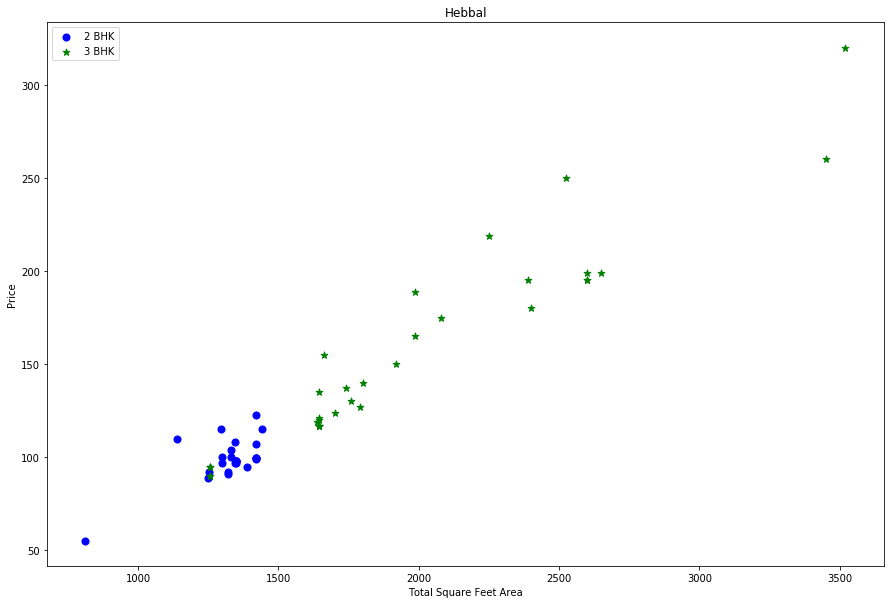

In [220]:
Plot_scatter_chart(df8,"Hebbal")

In [221]:
for g in gp:
    print(g)

NameError: name 'gp' is not defined

In [ ]:
df8

In [ ]:
# To find the properties per_sqft_area

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.5)
plt.xlabel("price Per Sqft Feet")
plt.ylabel("count")

### Outlier Removal Using Bathrooms Feature

In [ ]:
df8.bath.unique()

In [ ]:
df8[df8.bath>10]

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

#No of baths 

In [ ]:
df8[df8.bath>df8.bhk+2]

# No of baths greater than no of bhks

In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

In [ ]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')
df10.head(5)

### Use One Hot Encoding For Location

In [222]:
pd.get_dummies(df10.price)

,11.500,12.000,13.000,13.500,14.000,14.040,15.000,15.135,16.000,16.450,...,720.000,750.000,763.000,775.000,800.000,864.000,900.000,995.000,1250.000,2200.000
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
dummies = pd.get_dummies(df10.location)
dummies.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [224]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df11

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,other,1155.0,2.0,64.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [226]:
df12 = df11.drop('location',axis='columns')
df12.head(3)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df12.shape

(5151, 245)

In [228]:
x = df12.drop('price',axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build a Model Now...

In [229]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [230]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [231]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8405210084528257

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [232]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.85710045, 0.84269588, 0.82674293])

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

Find best model using GridSearchCV

In [233]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearhcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
            
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearhcv(x,y)

,model,best_score,best_params
0,linear_regression,0.841529,{'normalize': False}
1,lasso,0.674486,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.725528,"{'criterion': 'mse', 'splitter': 'random'}"


In [234]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

### Test the model for few properties

In [235]:
#x = loc_index
def predict_price(location,sqft,bath,bhk,x):
    

    loc_index = np.where(x.columns == location)[0][0]
    x = np.zeros(len(x.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
         x[loc_index] = 1
    print(loc_index)
    
    return lr_clf.predict([x])[0]


In [236]:
predict_price('Indira Nagar',1000,3,3,x) 

116


177.1806746052883

In [237]:
predict_price('1st Phase JP Nagar',1000,2,2,x) 

4


78.9486013271375

In [238]:
predict_price('2nd Phase Judicial Layout',1000,2,2,x) 

5


25.359507048392985

In [239]:
predict_price('1st Phase JP Nagar',2000,2,2,x) 

4


178.02971633480465

### Export the tested model to a pickle file

In [246]:
import pickle
with open('Vizag_House_Data.csv_model1.pickle','wb') as f:
    pickle.dump(lr_clf,f)
    print(lr_clf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


### Export location and column information to a file that will be useful later on in our prediction application

In [244]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))